In [1]:
%load_ext autoreload
%autoreload 2

DTLZ2 is a multiobjective optimization test function. It has points evenly spread out across the pareto front. More information can be found [here](https://sop.tik.ee.ethz.ch/download/supplementary/testproblems/dtlz2/index.php).

In [2]:
from summit.strategies import TSEMO
from summit.benchmarks import DTLZ2, VLMOP2
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np

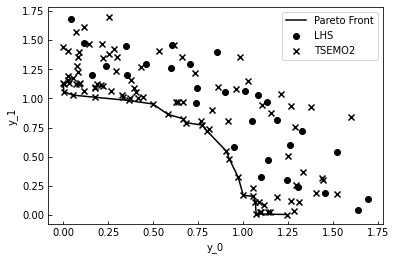

 /Users/Kobi/Documents/Research/summit/.venv/lib/python3.7/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


In [3]:
#Run the DTLZ2 benchmark
num_inputs=6
num_objectives=2
b = DTLZ2(num_inputs=num_inputs, 
          num_objectives=num_objectives)
strategy = TSEMO(b.domain, random_rate=0.00)
experiments = strategy.suggest_experiments(5*num_inputs)

for i in range(100):
    # Run experiments
    b.run_experiments(experiments)
    
    # Plot data
    clear_output(wait=True)
    fig, _ = b.pareto_plot()
    plt.show(fig)
    
    # Get suggestions
    nsga_options = dict(pop_size=100, iterations=100)
    experiments = strategy.suggest_experiments(1, b.data,
                                               **nsga_options)

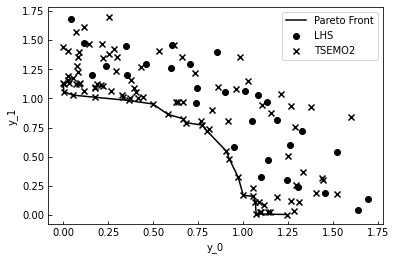

In [6]:
fig,ax = b.pareto_plot()
fig.savefig('TSEMO_DTLZ2.png', dpi=300)

In [7]:
#Save data from the run to disk
b.data.to_csv('dtlz2_y_python.csv')

The maximum achievable hypervolume for this problem is around 120.2. Let's see how the python algorithm performed and compare to the original Matlab algorithm.

In [8]:
from summit.utils.multiobjective import pareto_efficient, HvI
from summit.utils.dataset import DataSet
import numpy as np

data = DataSet.read_csv('dtlz2_y_python.csv')
y_pareto, _ = pareto_efficient(data[['y_0', 'y_1']].to_numpy(),maximize=False)
percent_pareto = y_pareto.shape[0]/data.shape[0]
print("Percent of points in pareto front: {0:.1f}%".format(percent_pareto*100))
print("Number of pareto points: ", len(y_pareto))
hv = HvI.hypervolume(y_pareto, [11,11])
print("Hypervolume: ", hv)

Percent of points in pareto front: 14.7%
Number of pareto points:  19
Hypervolume:  120.07321770653903


Comparison of Matlab runs with the same parameters.

In [5]:
import pandas as pd
data_matlab = pd.read_csv('dtlz2_y_matlab.csv', names=['y_0', 'y_1'])

y_pareto_ml, _ = pareto_efficient(data_matlab[['y_0', 'y_1']].to_numpy(),maximize=False)
percent_pareto_ml = y_pareto_ml.shape[0]/data_matlab.shape[0]
print("Percent of points in pareto front: {0:.1f}%".format(percent_pareto_ml*100))
print("Number of pareto points: ", len(y_pareto_ml))

hv_ml = HvI.hypervolume(y_pareto_ml, [11,11])
print("Hypervolume: ", hv_ml)

Percent of points in pareto front: 10.8%
Number of pareto points:  14
Hypervolume:  120.1512904541


I'm guessing the difference in hypervolume might come from the absence of spectral sampling in the python version.